## Code for plotting ensemble size data from experiments and simulations
This code takes the following input files:
(1) Rg distribution from all-atom simulations ('SERF_sim_Rgs.txt')
(2) Rg distribution of analytical flory random coil (AFRC) model ('AFRC_RG.csv')
(3) EOM distribution from low (0.56 mM) concentration SAXS ('EOM_dist_0.56mM.txt')
(4) EOM distribution from low (1.1 mM) concentration SAXS ('EOM_dist_1.1mM.txt')
(5) Parameters from Guinier analysis for low concentration SAXS ('low_guinier_params.txt')

In [2]:
## import packages ##

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats

In [3]:
## load data files ##

AFRC = np.loadtxt('AFRC_RG.csv')
simulation = np.loadtxt('SERF_sim_Rgs.txt')
EOM_low = np.loadtxt('EOM_dist_0.56mM.txt', skiprows = 5)
EOM_high = np.loadtxt('EOM_dist_1.1mM.txt', skiprows = 5)
saxs_params = np.loadtxt('low_guinier_params.txt')

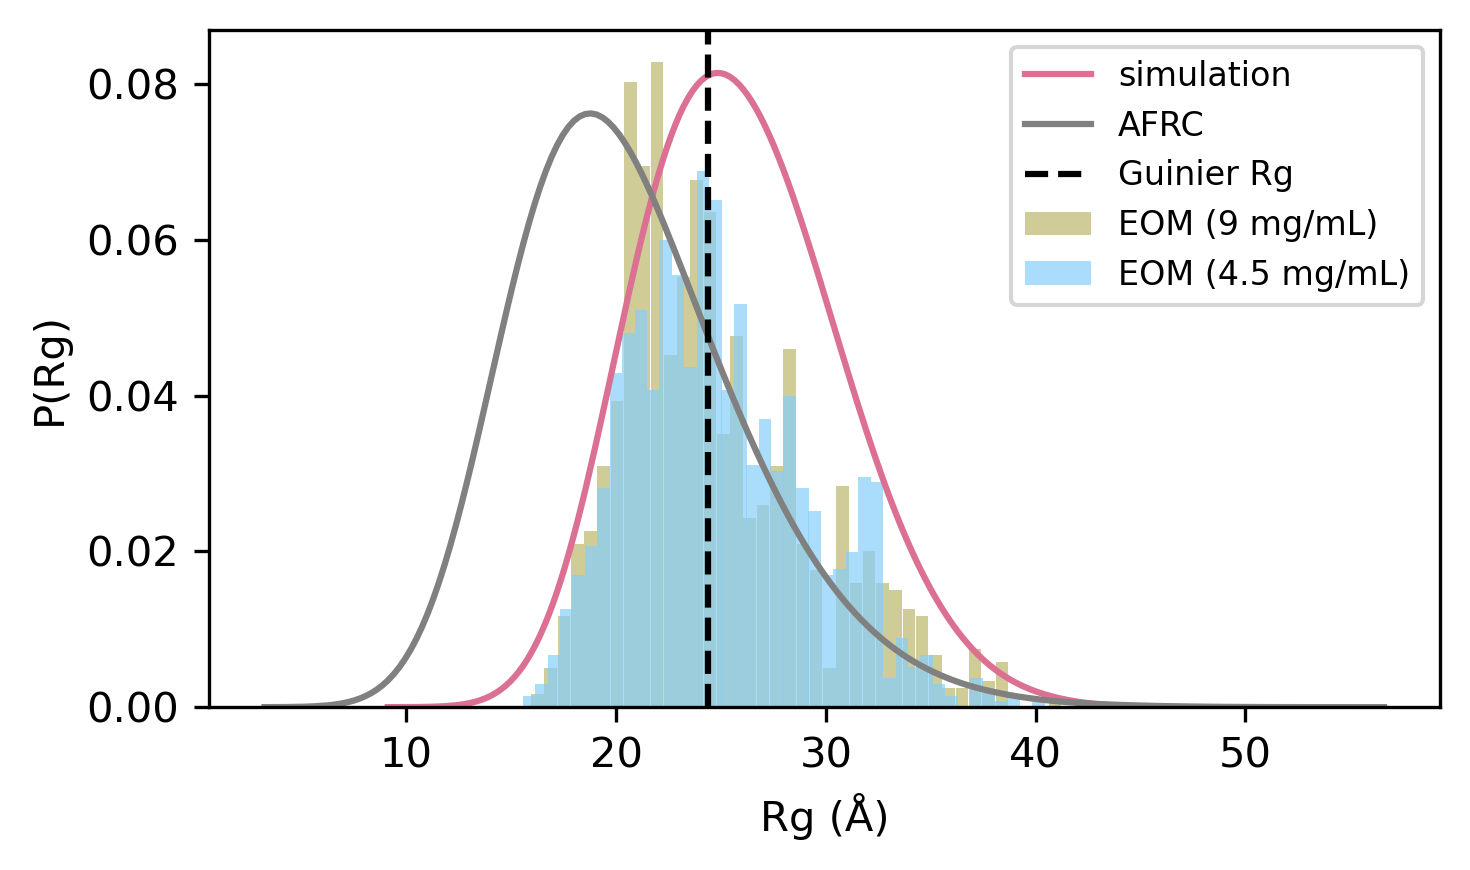

In [10]:
## plot distributions together for comparison -- generates Figure 2F

plt.figure(num = None, figsize = (5, 3), dpi = 300, facecolor = 'w', edgecolor = 'k')

sns.kdeplot(data = simulation, color = 'palevioletred', bw_method = 0.5, label = 'simulation')
sns.kdeplot(data = AFRC, color = 'grey', bw_method = 0.5, label = 'AFRC')
plt.bar(EOM_high[:,0], EOM_high[:,2], color = 'darkkhaki', width = 0.6, alpha = 0.7, label = 'EOM (9 mg/mL)')
plt.bar(EOM_low[:,0], EOM_low[:,2], color = 'lightskyblue', width = 0.6, alpha = 0.7, label = 'EOM (4.5 mg/mL)')
plt.axvline(x = saxs_params[0], linestyle = '--', color = 'k', label = 'Guinier Rg')

#ax.set_xlim([])
#ax.set_ylim([0, 200])

plt.xlabel('Rg (Å)')
plt.ylabel('P(Rg)')

plt.tight_layout()
plt.legend(loc = 'upper right', prop={'size': 8})

# UNCOMMENT below to save figure as PDF
#plt.savefig('Figure_2F_Rg_distributions.pdf', format = 'pdf', dpi = 300)
plt.show()